In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
data_csv_name = "final_test.csv"
data = pd.read_csv(data_csv_name, names=["data_structure", "num_threads", "num_ops", "key_range", "pct_get", "pct_add", "pct_remove", "throughput", "mem_util"])
data.head()

,data_structure,num_threads,num_ops,key_range,pct_get,pct_add,pct_remove,throughput,mem_util
0,sl,1,1000000,200000,0,50,50,2.051662e+06,31800640
1,sl,1,1000000,200000,0,50,50,1.863254e+06,31800640
2,sl,1,1000000,200000,0,50,50,1.971233e+06,31800640
3,sl,1,1000000,200000,0,50,50,1.972475e+06,31800640
4,sl,1,1000000,200000,0,50,50,1.875309e+06,31800640


In [4]:
gb = data.groupby([
    "data_structure",
    "num_threads",
    "num_ops",
    "key_range",
    "pct_get",
    "pct_add",
    "pct_remove"
]).agg({'throughput' : ['mean', 'min', 'max'], 'mem_util' : ['mean', 'min', 'max']})

In [5]:
gb.columns = ["throughput_mean", "throughput_min", "throughput_max", "mem_util_mean", "mem_util_min", "mem_util_max"]

In [6]:
gb = gb.reset_index()

In [7]:
gb

,data_structure,num_threads,num_ops,key_range,pct_get,pct_add,pct_remove,throughput_mean,throughput_min,throughput_max,mem_util_mean,mem_util_min,mem_util_max
0,bst,1,1000000,200000,0,50,50,3.166677e+06,2.890834e+06,3.339929e+06,7154568.0,7154568,7154568
1,bst,1,1000000,200000,70,20,10,4.292737e+06,4.113187e+06,4.418162e+06,7465752.0,7465752,7465752
2,bst,1,1000000,200000,90,9,1,5.709633e+06,5.600041e+06,5.792051e+06,5122872.0,5122872,5122872
3,bst,1,1000000,2000000,0,50,50,1.863025e+06,1.795487e+06,1.987160e+06,28333080.0,28333080,28333080
4,bst,1,1000000,2000000,70,20,10,3.603674e+06,3.433151e+06,3.748353e+06,13397616.0,13397616,13397616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,sl,10,1000000,200000,70,20,10,3.319615e+06,3.289607e+06,3.340608e+06,42677056.0,42650880,42715520
68,sl,10,1000000,200000,90,9,1,3.490632e+06,3.443063e+06,3.509318e+06,57201216.0,57152320,57248320
69,sl,10,1000000,2000000,0,50,50,2.379752e+06,2.359477e+06,2.398863e+06,317734208.0,317550080,317905600
70,sl,10,1000000,2000000,70,20,10,2.675115e+06,2.644625e+06,2.692225e+06,331483776.0,331353920,331571840


In [8]:
gb[(gb.data_structure == "bst") & (gb.pct_add == 50)]

,data_structure,num_threads,num_ops,key_range,pct_get,pct_add,pct_remove,throughput_mean,throughput_min,throughput_max,mem_util_mean,mem_util_min,mem_util_max
0,bst,1,1000000,200000,0,50,50,3.166677e+06,2.890834e+06,3.339929e+06,7154568.0,7154568,7154568
3,bst,1,1000000,2000000,0,50,50,1.863025e+06,1.795487e+06,1.987160e+06,28333080.0,28333080,28333080
6,bst,2,1000000,200000,0,50,50,4.859888e+06,4.649288e+06,5.189424e+06,7183468.8,7172064,7199784
9,bst,2,1000000,2000000,0,50,50,2.801338e+06,2.771630e+06,2.821596e+06,45531057.6,45480816,45583488
12,bst,4,1000000,200000,0,50,50,5.659407e+06,5.533612e+06,5.855379e+06,7204363.2,7193088,7221024
15,bst,4,1000000,2000000,0,50,50,3.803430e+06,3.710256e+06,3.890612e+06,62267659.2,62201448,62327304
18,bst,6,1000000,200000,0,50,50,5.552818e+06,5.483212e+06,5.620468e+06,7200331.2,7179120,7224408
21,bst,6,1000000,2000000,0,50,50,4.365052e+06,4.274314e+06,4.438332e+06,68391576.0,68351832,68432832
24,bst,8,1000000,200000,0,50,50,5.316890e+06,5.281117e+06,5.356169e+06,7206998.4,7182432,7220664
27,bst,8,1000000,2000000,0,50,50,4.509812e+06,4.433452e+06,4.573875e+06,70711732.8,70698528,70731288


In [9]:
def plot_graph(title, x1, y1, x2, y2):
    plt.plot(x1, y1 / 1000, label="BST")
    plt.plot(x1, y2 / 1000, label="SL")
    plt.xlabel("Number of threads")
    plt.ylabel("Average operations (thousands) per second")
    plt.title(title)
    plt.legend()

In [10]:
bst_data_50_50_200k = gb[(gb.data_structure == "bst") & (gb.pct_add == 50) & (gb.key_range == 200000)]
sl_data_50_50_200k = gb[(gb.data_structure == "sl") & (gb.pct_add == 50) & (gb.key_range == 200000)]

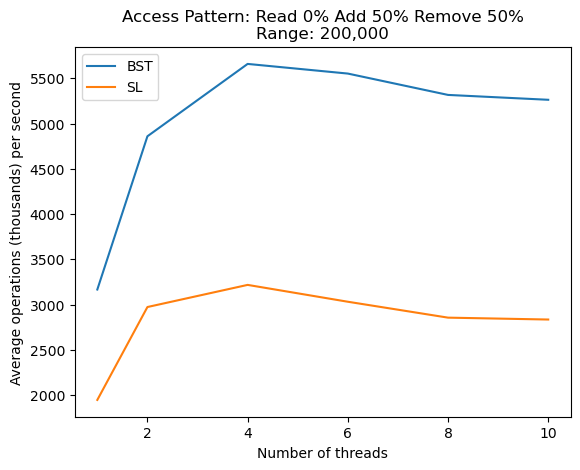

In [12]:
plt.plot(bst_data_50_50_200k.num_threads, bst_data_50_50_200k.throughput_mean / 1000, label="BST")
plt.plot(bst_data_50_50_200k.num_threads, sl_data_50_50_200k.throughput_mean / 1000, label="SL")
plt.xlabel("Number of threads")
plt.ylabel("Average operations (thousands) per second")
plt.title("Access Pattern: Read 0% Add 50% Remove 50%\nRange: 200,000")
plt.legend()

In [13]:
bst_data_50_50_2M = gb[(gb.data_structure == "bst") & (gb.pct_add == 50) & (gb.key_range == 2000000)]
sl_data_50_50_2M = gb[(gb.data_structure == "sl") & (gb.pct_add == 50) & (gb.key_range == 2000000)]

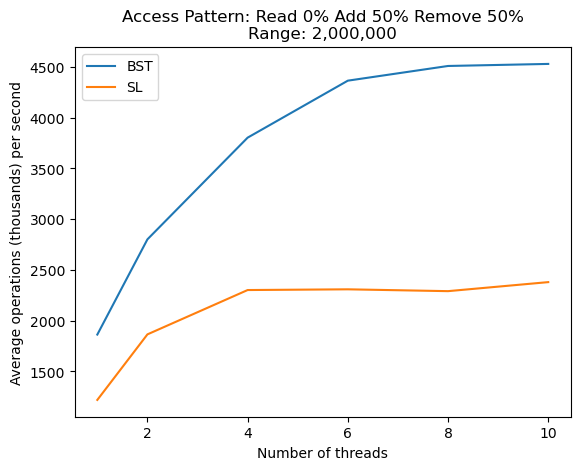

In [14]:
plt.plot(bst_data_50_50_2M.num_threads, bst_data_50_50_2M.throughput_mean / 1000, label="BST")
plt.plot(bst_data_50_50_2M.num_threads, sl_data_50_50_2M.throughput_mean / 1000, label="SL")
plt.xlabel("Number of threads")
plt.ylabel("Average operations (thousands) per second")
plt.title("Access Pattern: Read 0% Add 50% Remove 50%\nRange: 2,000,000")
plt.legend()

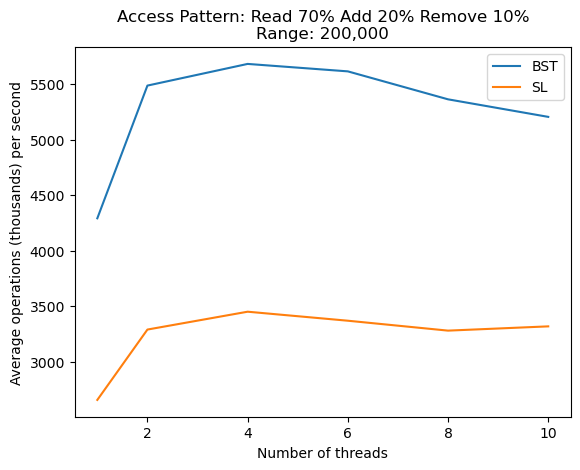

In [15]:
bst_data_70_20_10_200k = gb[(gb.data_structure == "bst") & (gb.pct_add == 20) & (gb.key_range == 200000)]
sl_data_70_20_10_200k = gb[(gb.data_structure == "sl") & (gb.pct_add == 20) & (gb.key_range == 200000)]
plot_graph(
    "Access Pattern: Read 70% Add 20% Remove 10%\nRange: 200,000",
    bst_data_70_20_10_200k.num_threads,
    bst_data_70_20_10_200k.throughput_mean,
    sl_data_70_20_10_200k.num_threads,
    sl_data_70_20_10_200k.throughput_mean
)

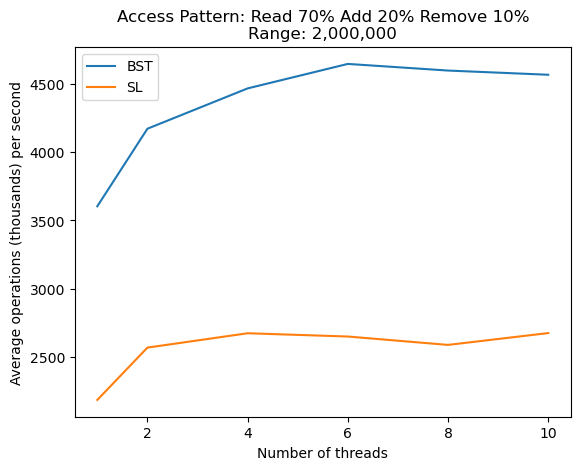

In [16]:
bst_data_70_20_10_2M = gb[(gb.data_structure == "bst") & (gb.pct_add == 20) & (gb.key_range == 2000000)]
sl_data_70_20_10_2M = gb[(gb.data_structure == "sl") & (gb.pct_add == 20) & (gb.key_range == 2000000)]
plot_graph(
    "Access Pattern: Read 70% Add 20% Remove 10%\nRange: 2,000,000",
    bst_data_70_20_10_2M.num_threads,
    bst_data_70_20_10_2M.throughput_mean,
    sl_data_70_20_10_2M.num_threads,
    sl_data_70_20_10_2M.throughput_mean
)

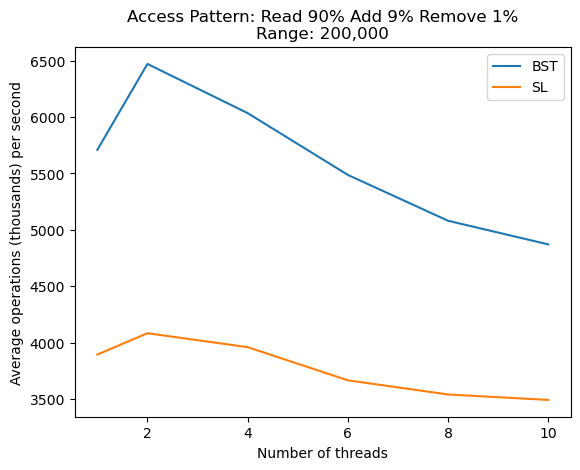

In [17]:
bst_data_90_9_1_200k = gb[(gb.data_structure == "bst") & (gb.pct_add == 9) & (gb.key_range == 200000)]
sl_data_90_9_1_200k = gb[(gb.data_structure == "sl") & (gb.pct_add == 9) & (gb.key_range == 200000)]
plot_graph(
    "Access Pattern: Read 90% Add 9% Remove 1%\nRange: 200,000",
    bst_data_90_9_1_200k.num_threads,
    bst_data_90_9_1_200k.throughput_mean,
    sl_data_90_9_1_200k.num_threads,
    sl_data_90_9_1_200k.throughput_mean
)

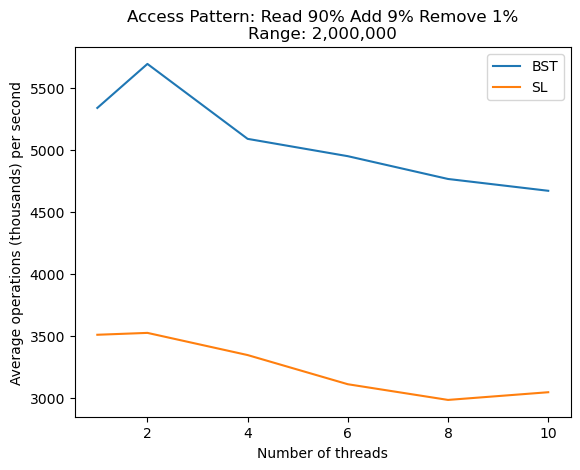

In [18]:
bst_data_90_9_1_2M = gb[(gb.data_structure == "bst") & (gb.pct_add == 9) & (gb.key_range == 2000000)]
sl_data_90_9_1_2M = gb[(gb.data_structure == "sl") & (gb.pct_add == 9) & (gb.key_range == 2000000)]
plot_graph(
    "Access Pattern: Read 90% Add 9% Remove 1%\nRange: 2,000,000",
    bst_data_90_9_1_2M.num_threads,
    bst_data_90_9_1_2M.throughput_mean,
    sl_data_90_9_1_2M.num_threads,
    sl_data_90_9_1_2M.throughput_mean
)